# Mạng nơ ron đơn tầng, 2 lớp (Tensorflow): thực hành 1, 2, 3 slides 3

* Họ tên: Kim Minh Thắng
* Mã số sinh viên: B2007210

## Thực hành 1

### 1.1 Import tensorflow

In [1]:
import tensorflow as tf 

2023-08-23 11:23:09.877164: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-23 11:23:09.918682: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 11:23:10.174832: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 11:23:10.176396: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 11:23:11.241827: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### 1.2 Đồ thị tính toán

```mermaid
flowchart BT
    X((X)) --> matmul((matmul))
    W((W)) --> matmul
    matmul --> +((+))
    b((b)) --> +
    + --> sigmoid((sigmoid))
    sigmoid --> y((y_hat))
```

In [8]:
@tf.function
def predict(X, W, b):
    return tf.sigmoid(tf.matmul(X, W) + b)

### 1.3 Hàm lỗi

```mermaid
flowchart BT
    y_hat((y_hat)) --> sub
    y((y)) --> sub(("-"))
    sub --> square((^2))
    square --> reduce_mean((reduce_mean))
    reduce_mean --> L((L))
```

In [11]:
@tf.function
def loss(y, y_hat):
    return tf.reduce_mean((y - y_hat)**2)

### 1.4 Tính đạo hàm riêng tự động với `GradientTape`

In [12]:
X = tf.constant([[0.0, 0], [0, 1], [1, 0], [1, 1]])
y = tf.constant([[0.0], [0], [0], [1]])
W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.random.normal(()))

alpha = 0.1

In [13]:
loss_his = []

for it in range(500):
    with tf.GradientTape() as tape:
        current_loss = loss(y, predict(X, W, b))
    
    loss_his.append(current_loss)
    
    dW, db = tape.gradient(current_loss, [W, b])
    W.assign_sub(alpha * dW)
    b.assign_sub(alpha * db)

### 1.5 Dự đoán

In [15]:
y_hat = predict(X, W, b)
y_hat

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.08065389],
       [0.2858792 ],
       [0.27887645],
       [0.63829494]], dtype=float32)>

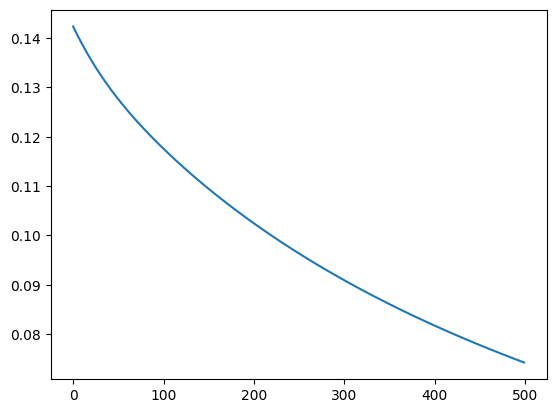

In [16]:
import matplotlib.pyplot as plt

plt.plot(loss_his)

## Thực hành 2

- Làm lại bài thực hành 1 với hàm lỗi `binary crossentropy` được định nghĩa như sau:

    $
\begin{aligned}
\text{L}(y, \hat{y}) = -\frac{1}{m}\sum_{i=1}^{m}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{aligned}
    $


### 2.1 Import tensorflow

In [72]:
import tensorflow as tf

### 2.2 Đồ thị tính toán

```mermaid
flowchart BT
    X((X)) --> matmul((matmul))
    W((W)) --> matmul
    matmul --> +((+))
    b((b)) --> +
    + --> sigmoid((sigmoid))
    sigmoid --> y((y_hat))
```

In [73]:
@tf.function
def predict(X, W, b):
    return tf.sigmoid(tf.matmul(X, W) + b)

### 2.3 Hàm lỗi

$
\begin{aligned}
\text{L}(y, \hat{y}) = -\frac{1}{m}\sum_{i=1}^{m}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{aligned}
$

In [74]:
@tf.function
def loss(y, y_hat):
    return - tf.reduce_mean(y * tf.math.log(y_hat) + (1 - y) * tf.math.log(1 - y_hat))

### 2.4 Tính đạo hàm riêng tự động với `GradientTape`

In [75]:
X = tf.constant([[0.0, 0], [0, 1], [1, 0], [1, 1]])
y = tf.constant([[0.0], [0], [0], [1]])
W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.random.normal(()))

alpha = 0.1

In [76]:
loss_his = []
for it in range(500):
    with tf.GradientTape() as tape:
        current_loss = loss(y, predict(X, W, b))
    
    loss_his.append(current_loss)
    
    dW, db = tape.gradient(current_loss, [W, b])
    W.assign_sub(alpha * dW)
    b.assign_sub(alpha * db)

### 2.5 Dự đoán

In [77]:
y_hat = predict(X, W, b)
y_hat

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.00133216],
       [0.08831336],
       [0.08836398],
       [0.8756035 ]], dtype=float32)>

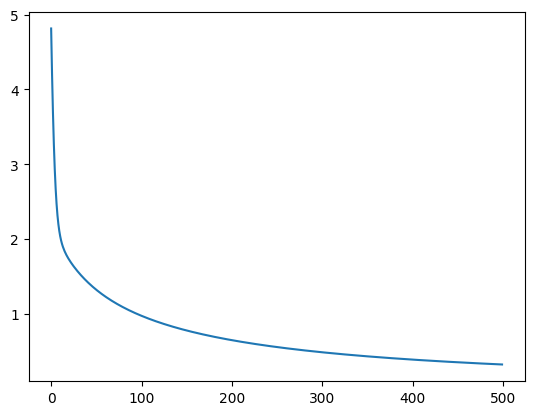

In [78]:
import matplotlib.pyplot as plt

plt.plot(loss_his)

## Thực hành 3

Làm lại bài phân loại hoa iris (2 lớp) với tensorflow thay vì dùng keras
- Sử dụng hàm lỗi `binary crossentropy`
- Cần phân ngưỡng kết quả đầu ra để có nhãn chính xác
- Tính độ chính xác phân lớp bằng cách so sánh nhãn dự báo và nhãn mong muốn

Có thể dùng hàm `Tensor.numpy()` để lấy giá trị của tensor về dạng numpy để hậu xử lý.

### Import các thư viện cần thiết

In [79]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

### 3.1 Đọc và dữ liệu

In [80]:
df = pd.read_csv('./Iris.csv')
df = df.head(100)

In [81]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [82]:
le = LabelEncoder()

y = df['Species'].values

le.fit(y)

y = le.transform(y)

pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

### 3.2 Định nghĩa hàm dự đoán

In [85]:
@tf.function
def predict(X, W, b):
    return tf.sigmoid(tf.matmul(X, W) + b)

### 3.3 Định nghĩa hàm lỗi (binary crossentropy)

In [86]:
@tf.function
def loss(y, y_hat):
    return - tf.reduce_mean(y * tf.math.log(y_hat) + (1 - y) * tf.math.log(1 - y_hat))

### 3.4 Train model

In [87]:
W = tf.Variable(tf.random.normal((4, 1)))
b = tf.Variable(tf.random.normal(()))
alpha = 0.1

In [88]:
loss_his = []

for it in range(500):
    with tf.GradientTape() as tape:
        current_loss = loss(y_train, predict(x_train, W, b))
    
    loss_his.append(current_loss)
    
    dW, db = tape.gradient(current_loss, [W, b])
    
    W.assign_sub(alpha * dW)
    b.assign_sub(alpha * db)

### 3.5 Dự đoán

In [89]:
y_hat = predict(x_test, W, b)

y_hat = y_hat.numpy()

y_hat = [1 if i >= 0.5 else 0 for i in y_hat]

y_hat = tf.convert_to_tensor(y_hat, dtype=tf.float32)

print(f'Loss: {abs(y_hat - y_test).numpy().sum() / len(y_test) * 100}%')

Loss: 50.0%


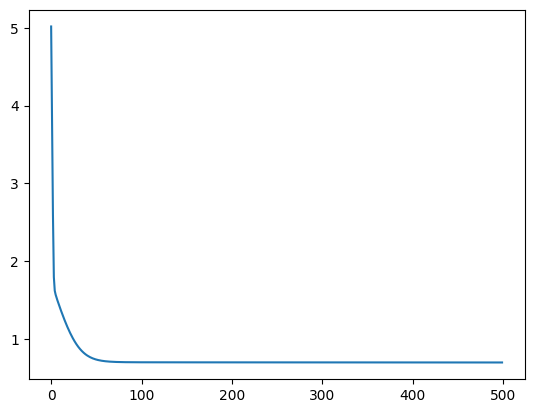

In [90]:
plt.plot(loss_his)